In [1]:
import pandas as pd
import requests
from io import BytesIO
import xgboost as xgb
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn import metrics
import advertools as adv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import plotly.express as px
import pickle
from xgboost import plot_importance
import plotly.graph_objects as go
import warnings
import optuna
from fitter import Fitter
warnings.filterwarnings('ignore')
import matplotlib. pyplot as plt 

In [97]:
df = pd.read_csv("/Users/birsenbas/Desktop/Kodluyoruz/finalProject/2019-2020-ismek-kesin-kaytl-kursiyer-verileri.csv", encoding="ISO-8859-1", error_bad_lines=False, delimiter=";")

In [98]:
df.head(10)

,Donem,Egitim Durumu,Engel Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi
0,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
1,2019-2020,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi
3,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
5,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Ismek Sertifika,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
6,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Ismek Sertifika,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
7,2019-2020,Lise,Engeli Olmayan,Calismiyor,Moda Tasarimi Ve Tekstil Teknolojisi,Giyim Uretiminde Temel Islemler,Hak Etmedi,Bagcilar Kirazli,Bagcilar,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
8,2019-2020,Lisans,Engeli Olmayan,Calismiyor,Gastronomi Ve Mutfak Sanatlari,Hamur Teknikleri,Hak Etmedi,K.Cekmece Halkali Toplu Konutlar,Kucukcekmece,Uretim Yaparak Gelir Elde Etmek,40-50 Yas Arasi
9,2019-2020,Lisans,Engeli Olmayan,Calismiyor,Gastronomi Ve Mutfak Sanatlari,Pastaci Ciragi,Meb Sertifika,K.Cekmece Halkali Toplu Konutlar,Kucukcekmece,Uretim Yaparak Gelir Elde Etmek,40-50 Yas Arasi


In [99]:
df = df.drop(["Donem", "Engel Durumu", "Program"], axis=1)

In [177]:
df

,Egitim Durumu,Calisma Durumu,Alan,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi,Uzaktan,Meslek,Calisan,GencKursiyer,Haketme,UniversandGenc,UzaktanOgrenci,UzaktanCalisiyor
0,Lisans,Ogrenci,Dil Egitimleri,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,0,0,0,1,0,0,0,0
1,Lise,Calismiyor,Spor,Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,0,0,0,1,0,0,0,0
2,Lisans,Ogrenci,Dil Egitimleri,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi,0,0,0,0,0,0,0,0
3,Lisans,Ogrenci,Spor,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0,0
4,Lisans,Ogrenci,Spor,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216760,Lisans,Calismiyor,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi,1,0,0,0,0,0,0,0
216761,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
216762,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
216763,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0


# create new features

In [178]:
def Uzaktan(df):
    if df["Kurs Merkezi"] == "Uzaktan Egitim":
        return 1
    else:
        return 0
    
df["Uzaktan"] = df.apply(lambda df:Uzaktan(df), axis=1)

In [179]:
def Meslek(df):
    if df["Tercih Sebebi"] == "Meslek Edinmek, Meslegimde Ýlerlemek" or df["Tercih Sebebi"] == "Uretim Yaparak Gelir Elde Etmek" or df["Tercih Sebebi"] == "Yeni Bir Meslek Edinmek":
        return 1
    else:
        return 0
    
df["Meslek"] = df.apply(lambda df:Meslek(df), axis=1)

In [180]:
def Calisan(df):
    if df["Calisma Durumu"] == "Calisiyor":
        return 1
    else:
        return 0
    
df["Calisan"] = df.apply(lambda df:Calisan(df), axis=1)

In [181]:
def GencKursiyer(df):
    if df["Yas Araligi"] == "20-30 Yas Arasi":
        return 1
    else:
        return 0
    
df["GencKursiyer"] = df.apply(lambda df:GencKursiyer(df), axis=1)

In [182]:
df

,Egitim Durumu,Calisma Durumu,Alan,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi,Uzaktan,Meslek,Calisan,GencKursiyer,Haketme,UniversandGenc,UzaktanOgrenci,UzaktanCalisiyor
0,Lisans,Ogrenci,Dil Egitimleri,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,0,1,0,1,0,0,0,0
1,Lise,Calismiyor,Spor,Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,0,0,0,1,0,0,0,0
2,Lisans,Ogrenci,Dil Egitimleri,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi,0,1,0,0,0,0,0,0
3,Lisans,Ogrenci,Spor,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0,0
4,Lisans,Ogrenci,Spor,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216760,Lisans,Calismiyor,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi,1,0,0,0,0,0,0,0
216761,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,1,0,1,0,0,0,0
216762,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,1,0,1,0,0,0,0
216763,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,1,0,1,0,0,0,0


In [183]:
df1 = df.loc[df['Alan'].isin(["Bilisim Teknolojileri", "Spor", "Grafik Ve Teknik Tasarim", "Dil Egitimleri", "Kisisel Gelisim Ve Egitim"])]

In [184]:
df1 = df1.loc[df['Alan'].isin(["Bilisim Teknolojileri", "Spor", "Grafik Ve Teknik Tasarim", "Dil Egitimleri", "Kisisel Gelisim Ve Egitim"])]

df1.loc[df["Alan"] == "Bilisim Teknolojileri", "Alan"] = 0
df1.loc[df["Alan"] == "Spor", "Alan"] = 1
df1.loc[df["Alan"] == "Grafik Ve Teknik Tasarim", "Alan"] = 2
df1.loc[df["Alan"] == "Dil Egitimleri", "Alan"] = 3
df1.loc[df["Alan"] == "Kisisel Gelisim Ve Egitim", "Alan"] = 4

# Encoding

In [185]:
from sklearn.preprocessing import LabelEncoder 
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [186]:
cat_cols = df.select_dtypes(include=["object"]).columns
df1 = MultiColumnLabelEncoder(columns = cat_cols).fit_transform(df1)

In [187]:
df1

,Egitim Durumu,Calisma Durumu,Alan,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi,Uzaktan,Meslek,Calisan,GencKursiyer,Haketme,UniversandGenc,UzaktanOgrenci,UzaktanCalisiyor
0,3,4,3,0,44,30,0,1,0,1,0,1,0,0,0,0
1,4,2,1,1,123,29,1,1,0,0,0,1,0,0,0,0
2,3,4,3,2,142,33,0,2,0,1,0,0,0,0,0,0
3,3,4,1,0,7,2,1,0,0,0,0,0,0,0,0,0
4,3,4,1,0,7,2,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216760,3,2,0,0,156,14,2,3,1,0,0,0,0,0,0,0
216761,3,4,2,1,156,14,0,1,1,1,0,1,0,0,0,0
216762,3,4,0,0,156,14,0,1,1,1,0,1,0,0,0,0
216763,3,4,0,0,156,14,0,1,1,1,0,1,0,0,0,0


# Model

In [190]:
X = df1.drop(["Alan"],axis=1)
y = df1.Alan

In [191]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 104, stratify=df1.Alan)

In [192]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     17916
           1       0.98      0.99      0.99      4651
           2       0.75      0.05      0.10      3081
           3       0.75      0.83      0.79      2854
           4       0.72      0.43      0.54      2711

    accuracy                           0.82     31213
   macro avg       0.80      0.66      0.66     31213
weighted avg       0.82      0.82      0.78     31213



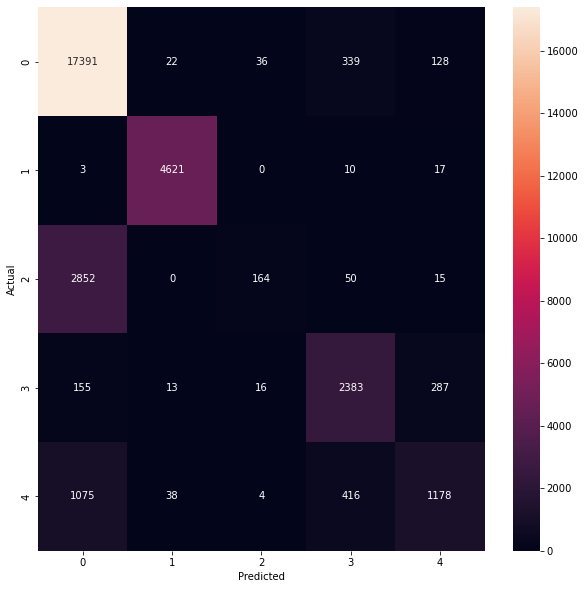

In [193]:
pred = xgb_cl.predict(X_test)
conf_mat = confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

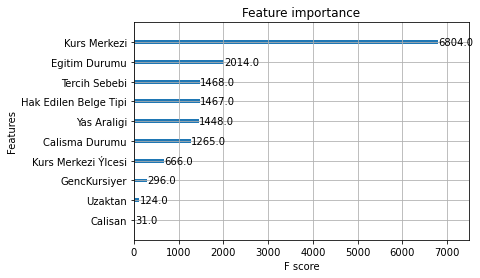

In [43]:
plot_importance(xgb_cl)

In [44]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    f1score = f1_score(y_test, y_pred, average='micro')
    return f1score

In [45]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-05-15 13:38:55,732] A new study created in memory with name: no-name-db06a2f0-6616-4b83-b3a7-441776a96af9
[I 2023-05-15 13:39:12,664] Trial 0 finished with value: 0.711786755518534 and parameters: {'max_depth': 1, 'learning_rate': 0.02138090676937394, 'n_estimators': 310, 'min_child_weight': 1, 'gamma': 3.331894266089758e-05, 'subsample': 0.32621623818783324, 'colsample_bytree': 0.08588337959940498, 'reg_alpha': 0.0016349907898358113, 'reg_lambda': 0.6396508988869297}. Best is trial 0 with value: 0.711786755518534.
[I 2023-05-15 13:39:46,613] Trial 1 finished with value: 0.8157818857527314 and parameters: {'max_depth': 8, 'learning_rate': 0.5658592890917574, 'n_estimators': 327, 'min_child_weight': 9, 'gamma': 1.1811410335767773e-05, 'subsample': 0.19349281411392988, 'colsample_bytree': 0.018539656994155225, 'reg_alpha': 0.0017232463204547098, 'reg_lambda': 0.007865832462744082}. Best is trial 1 with value: 0.8157818857527314.
[I 2023-05-15 13:40:10,042] Trial 2 finished with v

[I 2023-05-15 13:57:32,834] Trial 19 finished with value: 0.8211001826162176 and parameters: {'max_depth': 9, 'learning_rate': 0.23944399871591177, 'n_estimators': 379, 'min_child_weight': 2, 'gamma': 0.007870714334088076, 'subsample': 0.07470504666029551, 'colsample_bytree': 0.2253830213906108, 'reg_alpha': 1.5516924127206376e-07, 'reg_lambda': 1.1070183149303178e-07}. Best is trial 9 with value: 0.8245282414378624.


Number of finished trials: 20
Best trial:
  Value: 0.8245282414378624
  Params: 
    max_depth: 5
    learning_rate: 0.16116164634817415
    n_estimators: 455
    min_child_weight: 3
    gamma: 0.3870547111810606
    subsample: 0.5284825643777056
    colsample_bytree: 0.45649031923005934
    reg_alpha: 0.00025371058158402956
    reg_lambda: 2.069066319101171e-06


In [47]:
params = trial.params
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.45649031923005934, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3870547111810606, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.16116164634817415, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=455, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     17916
           1       0.98      0.99      0.99      4651
           2       0.76      0.05      0.10      3081
           3       0.75      0.83      0.79      2854
           4       0.71      0.44      0.55      2711

    accuracy                           0.82     31213
   macro avg       0.80      0.66      0.66     31213
weighted avg       0.82      0.82      0.78     31213



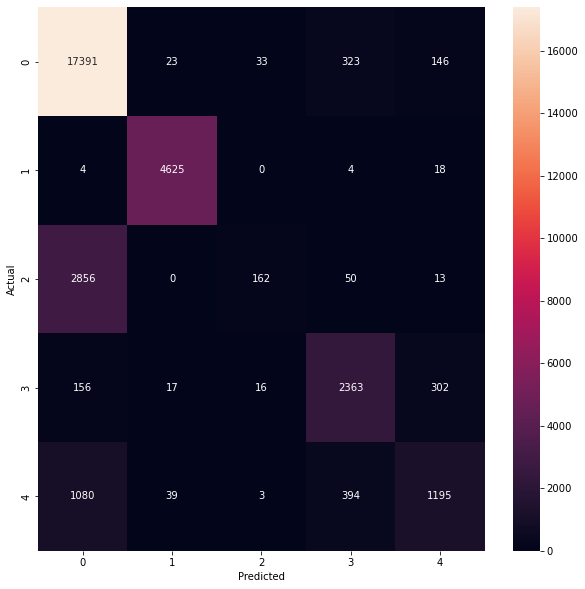

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

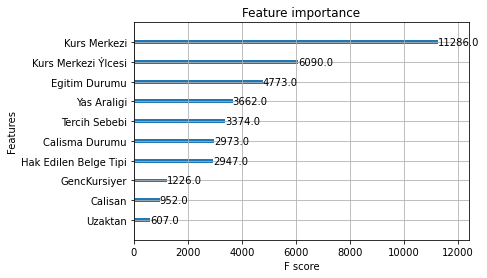

In [48]:
pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
plot_importance(model)

In [ ]:
yorum:hiçbir şey değişmedi:(

# daha fazla feature ekleme

In [194]:
def Haketme(df):
    if df["Hak Edilen Belge Tipi"] == "Ismek Sertifika" or df["Hak Edilen Belge Tipi"] == "Meb Sertifika":
        return 1
    else:
        return 0
    
df["Haketme"] = df.apply(lambda df:Haketme(df), axis=1)

In [195]:
#üniversiteye gidenler ve yaşı genç olanlar

def UniversandGenc(df):
    if df["Egitim Durumu"] == "Üniversite" or df["Yas Araligi"] == "20-30 Yas Arasi":
        return 1
    else:
        return 0
    
df["UniversandGenc"] = df.apply(lambda df:UniversandGenc(df), axis=1)

In [196]:
#uzaktan ve yaşı genç olanlar

def UzaktandOgrenci(df):
    if df["Kurs Merkezi"] == "Uzaktan" or df["Yas Araligi"] == "20-30 Yas Arasi":
        return 1
    else:
        return 0
    
df["UzaktanOgrenci"] = df.apply(lambda df:UzaktandOgrenci(df), axis=1)

In [197]:
#uzaktan ve çalışıyor olanlar

def UzaktanCalisiyor(df):
    if df["Kurs Merkezi"] == "Uzaktan" or df["Calisma Durumu"] == "Calisiyor":
        return 1
    else:
        return 0
    
df["UzaktanCalisiyor"] = df.apply(lambda df:UzaktanCalisiyor(df), axis=1)

In [198]:
df1 = df.loc[df['Alan'].isin(["Bilisim Teknolojileri", "Spor", "Grafik Ve Teknik Tasarim", "Dil Egitimleri", "Kisisel Gelisim Ve Egitim"])]

df1.loc[df["Alan"] == "Bilisim Teknolojileri", "Alan"] = 0
df1.loc[df["Alan"] == "Spor", "Alan"] = 1
df1.loc[df["Alan"] == "Grafik Ve Teknik Tasarim", "Alan"] = 2
df1.loc[df["Alan"] == "Dil Egitimleri", "Alan"] = 3
df1.loc[df["Alan"] == "Kisisel Gelisim Ve Egitim", "Alan"] = 4

In [199]:
df1

,Egitim Durumu,Calisma Durumu,Alan,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi,Uzaktan,Meslek,Calisan,GencKursiyer,Haketme,UniversandGenc,UzaktanOgrenci,UzaktanCalisiyor
0,Lisans,Ogrenci,3,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,0,1,0,1,0,1,1,0
1,Lise,Calismiyor,1,Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,0,0,0,1,1,1,1,0
2,Lisans,Ogrenci,3,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi,0,1,0,0,1,0,0,0
3,Lisans,Ogrenci,1,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0,0
4,Lisans,Ogrenci,1,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216760,Lisans,Calismiyor,0,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi,1,0,0,0,0,0,0,0
216761,Lisans,Ogrenci,2,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,1,0,1,1,1,1,0
216762,Lisans,Ogrenci,0,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,1,0,1,0,1,1,0
216763,Lisans,Ogrenci,0,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,1,0,1,0,1,1,0


# Model2

In [200]:
from sklearn.preprocessing import LabelEncoder 
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
cat_cols = df1.select_dtypes(include=["object"]).columns
df1 = MultiColumnLabelEncoder(columns = cat_cols).fit_transform(df1)

In [201]:
X = df1.drop(["Alan"],axis=1)
y = df1.Alan

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 104, stratify=df1.Alan)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     17916
           1       0.98      0.99      0.99      4651
           2       0.75      0.05      0.10      3081
           3       0.75      0.83      0.79      2854
           4       0.72      0.43      0.54      2711

    accuracy                           0.82     31213
   macro avg       0.80      0.66      0.66     31213
weighted avg       0.82      0.82      0.78     31213



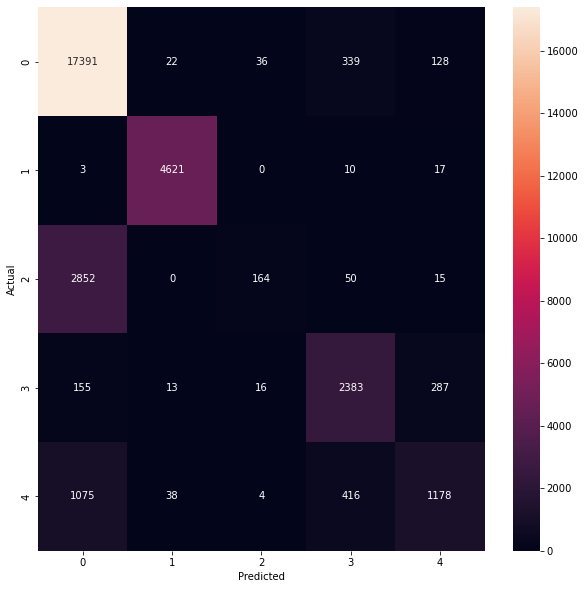

In [202]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,y_train)

pred = xgb_cl.predict(X_test)
conf_mat = confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

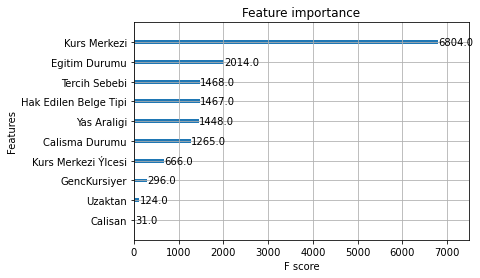

In [88]:
plot_importance(xgb_cl)

In [89]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    f1score = f1_score(y_test, y_pred, average='micro')
    return f1score

In [90]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-05-15 14:43:22,476] A new study created in memory with name: no-name-dc8caf05-1725-4e8e-9c61-d3fd3b4e7714
[I 2023-05-15 14:43:28,322] Trial 0 finished with value: 0.8040880402396438 and parameters: {'max_depth': 6, 'learning_rate': 0.5024492545271237, 'n_estimators': 72, 'min_child_weight': 4, 'gamma': 0.38100022098772457, 'subsample': 0.2853158131248085, 'colsample_bytree': 0.1273605856269712, 'reg_alpha': 2.546302262426446e-08, 'reg_lambda': 8.009354605740732e-06}. Best is trial 0 with value: 0.8040880402396438.
[I 2023-05-15 14:43:45,325] Trial 1 finished with value: 0.7447217505526543 and parameters: {'max_depth': 1, 'learning_rate': 0.09000959745269113, 'n_estimators': 374, 'min_child_weight': 9, 'gamma': 0.006473298143409918, 'subsample': 0.10655463734105317, 'colsample_bytree': 0.0407144396291741, 'reg_alpha': 0.0010671407795023607, 'reg_lambda': 7.771383475591334e-08}. Best is trial 0 with value: 0.8040880402396438.
[I 2023-05-15 14:44:14,192] Trial 2 finished with valu

[I 2023-05-15 14:50:46,244] Trial 19 finished with value: 0.8150770512286546 and parameters: {'max_depth': 8, 'learning_rate': 0.5167491384768451, 'n_estimators': 295, 'min_child_weight': 8, 'gamma': 0.002898885453797011, 'subsample': 0.18177401543922012, 'colsample_bytree': 0.05450768478880725, 'reg_alpha': 7.364246107050225e-08, 'reg_lambda': 0.9768125836683277}. Best is trial 18 with value: 0.8155255822894308.


Number of finished trials: 20
Best trial:
  Value: 0.8155255822894308
  Params: 
    max_depth: 8
    learning_rate: 0.5642329627161812
    n_estimators: 301
    min_child_weight: 7
    gamma: 0.038590987752029904
    subsample: 0.18572941046679553
    colsample_bytree: 0.045409661019515456
    reg_alpha: 6.560826585084225e-06
    reg_lambda: 0.00396800207038065


In [91]:
params = trial.params
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.045409661019515456, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.038590987752029904, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5642329627161812, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=301, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17916
           1       0.98      0.99      0.99      4651
           2       0.70      0.04      0.08      3081
           3       0.71      0.82      0.76      2854
           4       0.65      0.40      0.50      2711

    accuracy                           0.82     31213
   macro avg       0.77      0.64      0.64     31213
weighted avg       0.80      0.82      0.77     31213



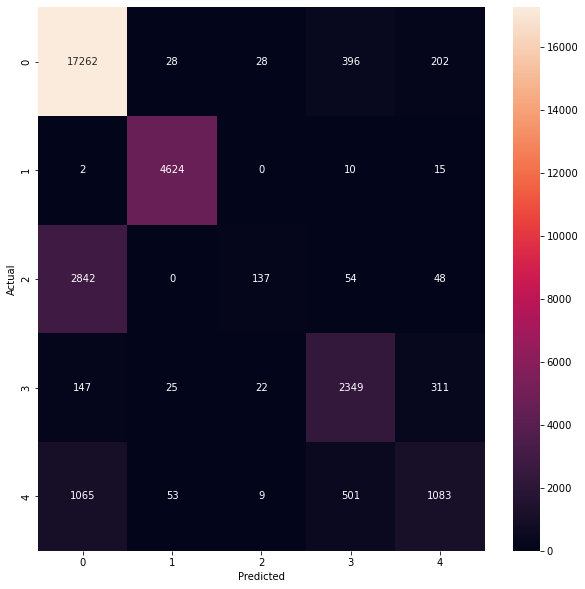

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

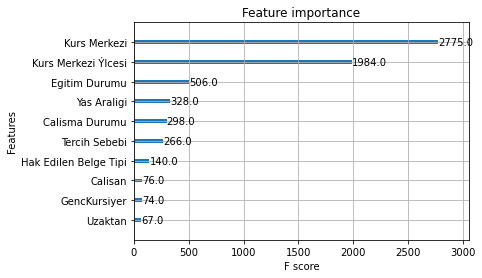

In [92]:
pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
plot_importance(model)

In [111]:
df1 = df.loc[df['Alan'].isin(["Bilisim Teknolojileri", "Spor", "Grafik Ve Teknik Tasarim", "Dil Egitimleri", "Kisisel Gelisim Ve Egitim"])]

In [112]:
df1["Alan"].value_counts()

Bilisim Teknolojileri        89580
Spor                         23254
Grafik Ve Teknik Tasarim     15405
Dil Egitimleri               14271
Kisisel Gelisim Ve Egitim    13555
Name: Alan, dtype: int64

In [117]:
mask = df1['Alan'] == "Grafik Ve Teknik Tasarim"
df_grafik = df1[mask]

In [125]:
df_grafik["Yas Araligi"].value_counts()

20-30 Yas Arasi    9141
30-40 Yas Arasi    3504
40-50 Yas Arasi    1406
20 Yas Alti         807
50-60 Yas Arasi     439
60 Yas ustu         108
Name: Yas Araligi, dtype: int64

In [116]:
df_grafik

,Egitim Durumu,Calisma Durumu,Alan,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi,Uzaktan,Meslek,Calisan,GencKursiyer,Haketme,UniversandGenc,UzaktanOgrenci,UzaktanCalisiyor
18,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
19,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
50,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Hak Etmedi,Uzaktan Egitim,Esenler,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
60,Lise,Ogrenci,Grafik Ve Teknik Tasarim,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
77,On Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,20-30 Yas Arasi,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216742,Ilkogretim,Calismiyor,Grafik Ve Teknik Tasarim,Ismek Sertifika,Uzaktan Egitim,Esenler,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,1,0,0,0,0,0,0,0
216748,Lisans,Calismiyor,Grafik Ve Teknik Tasarim,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi,1,0,0,0,0,0,0,0
216755,Lisans,Calisiyor,Grafik Ve Teknik Tasarim,Hak Etmedi,Uzaktan Egitim,Esenler,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,1,0,1,1,0,0,0,0
216761,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0


In [126]:
mask = df1['Alan'] == "Spor"
df_spor = df1[mask]

In [131]:
df_spor["Yas Araligi"].value_counts()

40-50 Yas Arasi    6222
30-40 Yas Arasi    6028
20-30 Yas Arasi    4691
50-60 Yas Arasi    3287
20 Yas Alti        2107
60 Yas ustu         919
Name: Yas Araligi, dtype: int64

In [132]:
df_grafik["Yas Araligi"].value_counts()

20-30 Yas Arasi    9141
30-40 Yas Arasi    3504
40-50 Yas Arasi    1406
20 Yas Alti         807
50-60 Yas Arasi     439
60 Yas ustu         108
Name: Yas Araligi, dtype: int64

In [128]:
df_spor["Tercih Sebebi"].value_counts()

Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek    17630
Sosyal Cevre Edinmek                               3773
Meslek Edinmek, Meslegimde Ýlerlemek               1064
Uretim Yaparak Gelir Elde Etmek                     787
Name: Tercih Sebebi, dtype: int64

In [130]:
df_grafik["Tercih Sebebi"].value_counts()

Meslek Edinmek, Meslegimde Ýlerlemek              10927
Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek     2125
Uretim Yaparak Gelir Elde Etmek                    2099
Sosyal Cevre Edinmek                                254
Name: Tercih Sebebi, dtype: int64

In [133]:
df_spor["Kurs Merkezi Ýlcesi"].value_counts()

Kartal           5313
Tuzla            2123
Sultanbeyli      1732
Gungoren         1600
Umraniye         1562
Kucukcekmece     1491
Gaziosmanpasa    1424
Silivri          1362
Buyukcekmece     1349
Beylikduzu       1239
Atasehir          978
Pendik            666
Catalca           604
Kagithane         380
Sultangazi        354
Esenyurt          300
Uskudar           290
Bakirkoy          210
Fatih             165
Zeytinburnu       112
Name: Kurs Merkezi Ýlcesi, dtype: int64

In [136]:
df_grafik["Kurs Merkezi Ýlcesi"].value_counts()

Esenler          14253
Fatih              321
Uskudar            294
Gaziosmanpasa      163
Basaksehir          78
Beylikduzu          69
Kucukcekmece        53
Umraniye            50
Esenyurt            37
Kartal              26
Zeytinburnu         25
Kagithane           24
Kadikoy             12
Name: Kurs Merkezi Ýlcesi, dtype: int64

In [137]:
df_spor["Kurs Merkezi"].value_counts()

Kartal Yakacik Spor Egitim Merkezi                                                          1814
Tuzla Spor Egitim Merkezi                                                                   1807
Kartal Atalar Spor Egitim Merkezi                                                           1788
Gungoren Spor Egitim Merkezi                                                                1600
Kartal Hurriyet Mh. Spor Egitim Merkezi                                                     1591
Umraniye Mithatpasa Spor Egitim Merkezi                                                     1562
Sultanbeyli Mehmet Akif Spor Egitim Merkezi                                                 1520
K.Cekmece Sefakoy Spor Egitim Merkezi                                                       1491
Gaziosmanpasa Spor Egitim Merkezi                                                           1424
Silivri Spor Egitim Merkezi                                                                 1362
Buyukcekmece Mimaroba Spor Egi

In [138]:
df_grafik["Kurs Merkezi"].value_counts()

Uzaktan Egitim                           14205
Fatih Grafik Tasarim Okulu                 321
Uskudar Ahmediye                           278
G.O.Pasa                                    84
Basaksehir 5.Etap                           78
K.Cekmece Yesilova                          53
G.O.Pasa 500 Evler                          48
Esenler Turgutreis                          48
Beylikduzu Beykent                          45
Umraniye Mithatpasa                         36
G.O.Pasa Kultur Merkezi Belnet Subesi       31
Kartal Orhantepe                            26
Esenyurt                                    25
Kagithane Sultan Selim Mahallesi            24
Beylikduzu Baris Mahallesi                  24
Uskudar Yavuzturk                           16
Umraniye Cakmak Mahallesi                   14
Zeytinburnu Gokalp Mahallesi                13
Esenyurt Kirac                              12
Kadikoy Rasimpasa Mahallesi                 12
Zeytinburnu Seyyid Nizam                    12
Name: Kurs Me

In [139]:
df_spor["Hak Edilen Belge Tipi"].value_counts()

Ismek Sertifika    15197
Hak Etmedi          8057
Name: Hak Edilen Belge Tipi, dtype: int64

In [140]:
df_grafik["Hak Edilen Belge Tipi"].value_counts()

Hak Etmedi         11560
Ismek Sertifika     3656
Meb Sertifika        189
Name: Hak Edilen Belge Tipi, dtype: int64

In [141]:
df_spor["Calisma Durumu"].value_counts()

Calismiyor    13467
Calisiyor      5392
Ogrenci        2797
Emekli          968
Bos             630
Name: Calisma Durumu, dtype: int64

In [142]:
df_grafik["Calisma Durumu"].value_counts()

Calismiyor    5566
Ogrenci       5220
Calisiyor     4464
Emekli         155
Name: Calisma Durumu, dtype: int64

In [143]:
df_spor["Egitim Durumu"].value_counts()

Lise                      6858
Lisans                    5216
Ilkokul                   4137
On Lisans                 2646
Ilkogretim                2523
Meslek Lisesi              821
Yuksek Lisans              683
Okur Yazar                 180
Okuma Yazma Bilmiyorum     121
Doktora                     69
Name: Egitim Durumu, dtype: int64

In [144]:
df_grafik["Egitim Durumu"].value_counts()

Lisans                    7701
On Lisans                 3289
Lise                      2445
Yuksek Lisans             1091
Meslek Lisesi              481
Ilkogretim                 212
Ilkokul                     85
Doktora                     71
Okur Yazar                  26
Okuma Yazma Bilmiyorum       4
Name: Egitim Durumu, dtype: int64

In [145]:
df1["Kurs Merkezi"].value_counts()

Uzaktan Egitim                        100104
Fatih Bilisim Okulu                     2277
Fatih Dil Okulu                         2111
Kartal Yakacik Spor Egitim Merkezi      1814
Tuzla Spor Egitim Merkezi               1807
                                       ...  
Maltepe Cezaevi                           24
Bagcilar Fatih                            18
Tuzla Aydintepe                           17
Ibb Genclik Meclisi                       12
Umraniye Engelliler Merkezi                8
Name: Kurs Merkezi, Length: 161, dtype: int64

In [146]:
df1

,Egitim Durumu,Calisma Durumu,Alan,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi,Uzaktan,Meslek,Calisan,GencKursiyer,Haketme,UniversandGenc,UzaktanOgrenci,UzaktanCalisiyor
0,Lisans,Ogrenci,Dil Egitimleri,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,0,0,0,1,0,0,0,0
1,Lise,Calismiyor,Spor,Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,0,0,0,1,0,0,0,0
2,Lisans,Ogrenci,Dil Egitimleri,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi,0,0,0,0,0,0,0,0
3,Lisans,Ogrenci,Spor,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0,0
4,Lisans,Ogrenci,Spor,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216760,Lisans,Calismiyor,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi,1,0,0,0,0,0,0,0
216761,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
216762,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
216763,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0


In [147]:
mask = df1['Alan'] == "Bilisim Teknolojileri"
df_bilisim = df1[mask]

In [148]:
df_bilisim

,Egitim Durumu,Calisma Durumu,Alan,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi,Uzaktan,Meslek,Calisan,GencKursiyer,Haketme,UniversandGenc,UzaktanOgrenci,UzaktanCalisiyor
12,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
13,Lisans,Ogrenci,Bilisim Teknolojileri,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
14,On Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
21,Lisans,Calismiyor,Bilisim Teknolojileri,Ismek Sertifika,Sancaktepe Samandira,Sancaktepe,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,0,0,0,1,0,0,0,0
22,Lisans,Calisiyor,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216758,Lisans,Calismiyor,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi,1,0,0,0,0,0,0,0
216759,Lisans,Calismiyor,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi,1,0,0,0,0,0,0,0
216760,Lisans,Calismiyor,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi,1,0,0,0,0,0,0,0
216762,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0


In [149]:
df_bilisim["Kurs Merkezi"].value_counts()

Uzaktan Egitim                        81235
Fatih Bilisim Okulu                    2229
Bagcilar Baglar                         276
Kartal Bulent Ecevit Belnet Subesi      205
Uskudar Ahmediye                        204
                                      ...  
Pendik Suluntepe                         12
Beyoglu Kasimpasa                        12
Atasehir Icerenkoy                       12
Fatih Engelliler Merkezi                  9
Umraniye Engelliler Merkezi               8
Name: Kurs Merkezi, Length: 90, dtype: int64

In [150]:
df_bilisim["Kurs Merkezi Ýlcesi"].value_counts()

Esenler          81482
Fatih             2380
Bagcilar           587
Kagithane          585
Kartal             408
Kucukcekmece       380
Umraniye           315
Uskudar            313
Gaziosmanpasa      294
Pendik             281
Sancaktepe         276
Esenyurt           228
Sultanbeyli        222
Zeytinburnu        199
Basaksehir         187
Eyupsultan         183
Beylikduzu         174
Sultangazi         156
Avcilar            156
Cekmekoy           149
Arnavutkoy         126
Atasehir           108
Bakirkoy            84
Gungoren            64
Buyukcekmece        61
Kadikoy             36
Sariyer             36
Bahcelievler        26
Maltepe             24
Tuzla               24
Catalca             24
Beyoglu             12
Name: Kurs Merkezi Ýlcesi, dtype: int64

In [151]:
mask = df1['Alan'] == "Dil Egitimleri"
df_dil = df1[mask]

In [152]:
df_dil["Kurs Merkezi"].value_counts()

Fatih Dil Okulu               2111
Dil Okulu                      842
Zeytinburnu 58.Bulvar          407
Umraniye Ataturk Mahallesi     390
Basaksehir 5.Etap              343
                              ... 
Eyupsultan Gokturk              20
Uskudar Yavuzturk               20
Sultanbeyli Bosna Bulvari       20
Bagcilar Fatih                  18
Pendik Orhangazi                14
Name: Kurs Merkezi, Length: 110, dtype: int64

In [153]:
df_dil["Kurs Merkezi Ýlcesi"].value_counts()

Fatih            2309
Kagithane         915
Uskudar           852
Sisli             842
Pendik            741
Umraniye          653
Eyupsultan        648
Zeytinburnu       587
Basaksehir        521
Gaziosmanpasa     466
Bahcelievler      455
Esenyurt          450
Kartal            391
Bagcilar          385
Sancaktepe        339
Sultanbeyli       332
Avcilar           310
Atasehir          291
Buyukcekmece      277
Sultangazi        251
Tuzla             244
Kucukcekmece      238
Maltepe           235
Silivri           224
Esenler           206
Kadikoy           177
Beylikduzu        166
Gungoren          125
Sariyer           112
Beyoglu           108
Sile              100
Bakirkoy           82
Catalca            62
Beykoz             62
Arnavutkoy         50
Adalar             43
Cekmekoy           22
Name: Kurs Merkezi Ýlcesi, dtype: int64

In [156]:
mask = df1['Kurs Merkezi'] == "Uzaktan Egitim"
df_uzaktan = df1[mask]

In [158]:
mask = df1['Kurs Merkezi Ýlcesi'] == "Esenler"
df_ilçe = df1[mask]

In [157]:
df_uzaktan["Alan"].value_counts()

Bilisim Teknolojileri        81235
Grafik Ve Teknik Tasarim     14205
Kisisel Gelisim Ve Egitim     4664
Name: Alan, dtype: int64

In [159]:
df_ilçe["Alan"].value_counts()

Bilisim Teknolojileri        81482
Grafik Ve Teknik Tasarim     14253
Kisisel Gelisim Ve Egitim     5094
Dil Egitimleri                 206
Name: Alan, dtype: int64

In [161]:
df_ilçe.shape

(101035, 16)

In [162]:
df_uzaktan.shape

(100104, 16)

In [169]:
df_uzaktann["Kurs Merkezi Ýlcesi"].value_counts()

Esenler    105187
Name: Kurs Merkezi Ýlcesi, dtype: int64

In [170]:
df_ilçee["Kurs Merkezi"].value_counts()

Uzaktan Egitim                    105187
Firincilik Ve Pastacilik Okulu       786
Esenler Fevzicakmak                  634
Esenler Nenehatun                    559
Esenler Atisalani                    537
Esenler Turgutreis                   416
Esenler Metris Cezaevi               308
Esenler Fatih                         58
Name: Kurs Merkezi, dtype: int64

In [164]:
mask = df['Kurs Merkezi Ýlcesi'] == "Esenler"
df_ilçee = df[mask]

In [165]:
df_ilçee.shape

(108485, 16)

In [166]:
df.shape

(216765, 16)

In [167]:
mask = df['Kurs Merkezi'] == "Uzaktan Egitim"
df_uzaktann = df[mask]

In [168]:
df_uzaktann.shape

(105187, 16)

yorum: görüyorum ki Uzaktan eğitimlerin hepsi Esenler de yapılıyor. yani Uzaktan ve Esenler verileri modelin eğitimine baya bir engel oluyor. 

In [173]:
df_ilçee["Alan"].value_counts()

Bilisim Teknolojileri                   81482
Grafik Ve Teknik Tasarim                14253
Kisisel Gelisim Ve Egitim                5094
Muhasebe Ve Finans                       3885
Moda Tasarimi Ve Tekstil Teknolojisi     1222
Gastronomi Ve Mutfak Sanatlari            852
Orgu Ve Ýsleme Sanatlari                  276
Yonetim Ve Hizmet                         230
Guzellik Ve Sac Bakim Hizmetleri          227
Dil Egitimleri                            206
El Sanatlari Teknolojisi                  199
Tekstil Tasarimi                          102
Muzik                                      85
Gida Teknolojisi                           72
Grafik Ve Fotograf                         68
Susleme Sanatlari                          58
Cocuk Gelisimi Ve Egitimi                  55
Sanat Ve Tasarim                           51
Yabanci Diller                             46
Ahsap Tasarimi Ve Teknolojileri            22
Name: Alan, dtype: int64

In [175]:
df_uzaktann["Alan"].value_counts()

Bilisim Teknolojileri                   81235
Grafik Ve Teknik Tasarim                14205
Kisisel Gelisim Ve Egitim                4664
Muhasebe Ve Finans                       3848
Moda Tasarimi Ve Tekstil Teknolojisi     1101
Grafik Ve Fotograf                         68
Yabanci Diller                             46
Cocuk Gelisimi Ve Egitimi                  20
Name: Alan, dtype: int64

In [174]:
df["Alan"].value_counts()

Bilisim Teknolojileri                   89580
Spor                                    23254
Grafik Ve Teknik Tasarim                15405
Dil Egitimleri                          14271
Kisisel Gelisim Ve Egitim               13555
Orgu Ve Ýsleme Sanatlari                 8618
Moda Tasarimi Ve Tekstil Teknolojisi     7198
Sanat Ve Tasarim                         5652
El Sanatlari Teknolojisi                 5347
Gastronomi Ve Mutfak Sanatlari           5213
Muhasebe Ve Finans                       5012
Yonetim Ve Hizmet                        3950
Tekstil Tasarimi                         3355
Guzellik Ve Sac Bakim Hizmetleri         2891
Muzik                                    2826
Susleme Sanatlari                        2636
Cocuk Gelisimi Ve Egitimi                2006
Kuyumculuk Ve Taki Tasarimi              1387
Ahsap Tasarimi Ve Teknolojileri          1363
Ziraat                                    866
Sahne Ve Gosteri Sanatlari                845
Muzik Ve Gosteri Sanatlari        

# yorumlar ve sonuç

Grafik-Tasarım ve Kişisel Gelişim tahminlerinin kötü olmasının sebebi:

analizlere göre Kurs Merkezi ve Kurs Merkezi ilçesi zaten modeli etkileyen önemli parametrelerdir. çoğu uzaktan yapılan eğitimlerde modelin tahminlemesi zayıf kalıyor(bilisim de veri çok fazla olduğu için onu hariç düşünebiliriz)
mesela dil eğitimlerinde veri nerdeyse grafik tasarım ile aynı olmasına rağmen tahminlemeler çok farklı. bunun sebebi de kurs merkezi olabilir.

ikinci bir ihtimal, ilçe dağılımları. yukarıda da gördüğümğz gibi Esenlerdeki dağılımın çoğu bilisimden sonra grafik tasarımda. yine düzgün bir dağılım olmadığı için tahminlemeyi kötü yapıyor diyebiliriz.


not: seçtiğimiz datada uzaktan eğitimlerin hepsi Esenler. yani Uzaktan ve Esenler verileri modelin eğitimine baya bir engel oluyor. 

sonuç: gruplandırarak ve çoğunu uzaktan eğitimlarin kapsadığı alanları hariç tutarak yeni alanlar seçeceğim ve tekrar modelleyeceğim. eğer yine tatmin etmezse, haketti-haketmedi tahmini yaptıracağım.

In [176]:
df

,Egitim Durumu,Calisma Durumu,Alan,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi,Uzaktan,Meslek,Calisan,GencKursiyer,Haketme,UniversandGenc,UzaktanOgrenci,UzaktanCalisiyor
0,Lisans,Ogrenci,Dil Egitimleri,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,0,0,0,1,0,0,0,0
1,Lise,Calismiyor,Spor,Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,0,0,0,1,0,0,0,0
2,Lisans,Ogrenci,Dil Egitimleri,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi,0,0,0,0,0,0,0,0
3,Lisans,Ogrenci,Spor,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0,0
4,Lisans,Ogrenci,Spor,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216760,Lisans,Calismiyor,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi,1,0,0,0,0,0,0,0
216761,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
216762,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
216763,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,0,1,0,0,0,0
